In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print(os.path.abspath("."))
MYDIR = "./../../ResearchProposal/data/"
MYDIR += "CommunityCommonsData/MentalHealthAndCrisisPrevention/Suicide"

myFiles = os.listdir(MYDIR)
print(os.path.abspath(MYDIR))
print()

print(myFiles)

print("Done")

C:\Users\alexg\Dropbox\SIT_PhD\DissertationTopic1\INFORMS2020\python
C:\Users\alexg\Dropbox\SIT_PhD\DissertationTopic1\ResearchProposal\data\CommunityCommonsData\MentalHealthAndCrisisPrevention\Suicide

['Suicide Mortality, Age Adj. Rate per 100k AL AK AR AS NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k CA CO CT DE NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k DC NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k FL GA HI ID NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k IL IN IA KS NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k KY LA MN MD NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k MA MI MN MS NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k MO MT NB NV NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k NC ND OH OK NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k NH NJ NM NY NVSS 2010-14.csv', 'Suicide Mortality, Age Adj. Rate per 100k OR PA RI SC SD NVSS 20

In [2]:
myFile = "SuicideMortalityData.csv"

myData = pd.read_csv(MYDIR + "/" + myFile)
myData.columns=[cc.lower() for cc in myData.columns]
myData.dropna(subset=["year"], inplace=True)
myData.year = myData.year.astype("int64")
myData.head()


,notes,state,statecode,county,st,countycode,year,yearcode,deaths,population,cruderate,cruderatelower95%confidenceinterval,cruderateupper95%confidenceinterval,cruderatestandarderror,ageadjustedrate,ageadjustedratelower95%confidenceinterval,ageadjustedrateupper95%confidenceinterval,ageadjustedratestandarderror,%oftotaldeaths
0,NaN,Alabama,1,Autauga,AL,1001.0,2016,2016.0,14.0,55416.0,25.3,13.8,42.4,6.8,23.0,12.6,38.7,6.2,0.00%
1,NaN,Alabama,1,Baldwin,AL,1003.0,2016,2016.0,42.0,208563.0,20.1,14.5,27.2,3.1,19.7,14.0,27.0,3.2,0.00%
2,NaN,Alabama,1,Blount,AL,1009.0,2016,2016.0,11.0,57704.0,19.1,9.5,34.1,5.7,16.4,7.9,30.2,5.1,0.00%
3,NaN,Alabama,1,Calhoun,AL,1015.0,2016,2016.0,25.0,114611.0,21.8,14.1,32.2,4.4,21.9,14.0,32.6,4.5,0.00%
4,NaN,Alabama,1,Chambers,AL,1017.0,2016,2016.0,15.0,33843.0,44.3,24.8,73.1,11.4,45.0,24.6,75.5,12.2,0.00%


In [3]:
scData = myData[["state", "county", "st", "year", "deaths", 
                 "population", "cruderate", "ageadjustedrate", 
                 "%oftotaldeaths"]].copy()

scData.rename(columns={"ageadjustedrate": "age_adjusted_rate", 
                       "%oftotaldeaths": "pct_total_deaths"}, inplace=True)
scData["county_state"] = scData["county"] + ", " + scData["state"]
scData.head()
scData.tail()

,state,county,st,year,deaths,population,cruderate,age_adjusted_rate,pct_total_deaths,county_state
10922,Wisconsin,Waukesha,WI,2004,28.0,376243.0,7.4,7.3,0.00%,"Waukesha, Wisconsin"
10923,Wisconsin,Winnebago,WI,2004,19.0,160130.0,11.9,11.9,0.00%,"Winnebago, Wisconsin"
10924,Wyoming,Laramie,WY,2004,12.0,85427.0,14.0,14.0,0.00%,"Laramie, Wyoming"
10925,Wyoming,Natrona,WY,2004,13.0,69035.0,18.8,18.3,0.00%,"Natrona, Wyoming"
10926,Wyoming,Sweetwater,WY,2004,10.0,38026.0,26.3,29.4,0.00%,"Sweetwater, Wyoming"


In [4]:
myFile = "SuicideMortalityCollatedData.csv"

myData = pd.read_csv(MYDIR + "/" + myFile)
myData.columns=[cc.lower() for cc in myData.columns]
myData.county = myData.county.str.replace(" Census Area", "")
myData["county_state"] = myData["county"] + ", " + myData["state"]
myData["cause_of_death"] = myData["cause_of_death"].str.lower()

myData.head()


sc_mortality_data = myData[myData["cause_of_death"] == "suicide"].copy()
sc_mortality_data.head()

,state,county,fips_code,time_period,cause_of_death,icd_10_codes,total_population__aggregate_,total_deaths,age_adjusted_death_rate,crude_death_rate,county_state
0,Alaska,Nome,2180,2010-2014,suicide,"U03, X60-X84, Y87.0",48972,36,75.8,73.5,"Nome, Alaska"
1,Arkansas,Baxter,5005,2010-2014,suicide,"U03, X60-X84, Y87.0",205911,60,30.9,29.1,"Baxter, Arkansas"
2,Alabama,Chambers,1017,2010-2014,suicide,"U03, X60-X84, Y87.0",170456,26,16.2,15.3,"Chambers, Alabama"
3,Alabama,Elmore,1051,2010-2014,suicide,"U03, X60-X84, Y87.0",401973,60,14.0,14.9,"Elmore, Alabama"
4,Alabama,DeKalb,1049,2010-2014,suicide,"U03, X60-X84, Y87.0",355642,58,16.3,16.3,"DeKalb, Alabama"


In [5]:
grpby = sc_mortality_data.groupby(("state", "county", "county_state", "time_period"))

deaths = pd.DataFrame(grpby["total_deaths"].sum()).reset_index()
population = pd.DataFrame(grpby["total_population__aggregate_"].sum()).reset_index()
deaths.head()
population.head()

age_adj_dr = pd.DataFrame(grpby["age_adjusted_death_rate"].mean()).reset_index()
crude_dr = pd.DataFrame(grpby["crude_death_rate"].mean()).reset_index()

age_adj_dr.head()
crude_dr.head()

"""
combine the data:
"""
pop_deaths = deaths.merge(population)
pop_deaths.head()

mortality = age_adj_dr.merge(crude_dr)
mortality.head()

aggregate_data = pop_deaths.merge(mortality)
aggregate_data.head()

C:\Users\alexg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


,state,county,county_state,time_period,total_deaths,total_population__aggregate_,age_adjusted_death_rate,crude_death_rate
0,Alabama,Autauga,"Autauga, Alabama",2010-2014,54,275993,18.8,19.6
1,Alabama,Baldwin,"Baldwin, Alabama",2010-2014,185,955423,18.7,19.4
2,Alabama,Barbour,"Barbour, Alabama",2010-2014,20,135740,13.7,14.7
3,Alabama,Blount,"Blount, Alabama",2010-2014,51,288416,17.4,17.7
4,Alabama,Calhoun,"Calhoun, Alabama",2010-2014,88,586317,14.7,15.0


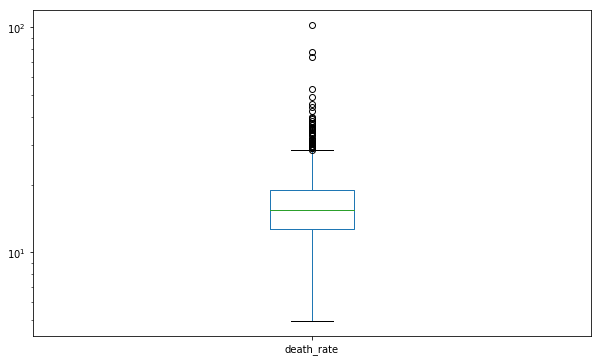

max attempt rate =  102.783


,state,county,county_state,time_period,total_deaths,total_population__aggregate_,age_adjusted_death_rate,crude_death_rate,death_rate
0,Alabama,Autauga,"Autauga, Alabama",2010-2014,54,275993,18.8,19.6,19.565714
1,Alabama,Baldwin,"Baldwin, Alabama",2010-2014,185,955423,18.7,19.4,19.363151
2,Alabama,Barbour,"Barbour, Alabama",2010-2014,20,135740,13.7,14.7,14.734050
3,Alabama,Blount,"Blount, Alabama",2010-2014,51,288416,17.4,17.7,17.682792
4,Alabama,Calhoun,"Calhoun, Alabama",2010-2014,88,586317,14.7,15.0,15.008946
5,Alabama,Chambers,"Chambers, Alabama",2010-2014,26,170456,16.2,15.3,15.253203
6,Alabama,Cherokee,"Cherokee, Alabama",2010-2014,31,130307,23.1,23.8,23.789973
7,Alabama,Chilton,"Chilton, Alabama",2010-2014,37,219239,16.8,16.9,16.876559
8,Alabama,Coffee,"Coffee, Alabama",2010-2014,46,253573,17.7,18.1,18.140733
9,Alabama,Colbert,"Colbert, Alabama",2010-2014,37,272449,13.4,13.6,13.580523


In [8]:
aggregate_data["death_rate"] = \
    1e+05 * aggregate_data["total_deaths"].astype("float64") /\
    aggregate_data["total_population__aggregate_"]
    
ax = aggregate_data["death_rate"].plot.box(figsize=(10, 6))
ax.set_yscale("log")
plt.show()

print(f"""max attempt rate = {aggregate_data.death_rate.max(): .3f}""")
aggregate_data

In [9]:
myCSV = MYDIR + "/" + myFile.replace(".csv", "_aggregated.csv")
aggregate_data.to_csv(myCSV, index=False)
print(f"""Saved the suicide attempt data to {myCSV}""")

Saved the suicide attempt data to ./../../ResearchProposal/data/CommunityCommonsData/MentalHealthAndCrisisPrevention/Suicide/SuicideMortalityCollatedData_aggregated.csv
